# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0 Carga del corpus

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

In [ ]:
%pip install nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Descargar stopwords (solo la primera vez)
nltk.download('stopwords')

# Elegimos inglés porque el 20newsgroups está en inglés
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Eliminar stopwords
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    # Volver a unir
    return ' '.join(tokens)

# Limpiar todos los documentos
newsgroupsdocs_clean = [clean_text(doc) for doc in newsgroupsdocs]

# Muestra el cambio en el primer documento
print('Antes:')
print(newsgroupsdocs[0][:400])
print('\nDespués de limpiar:')
print(newsgroupsdocs_clean[0][:400])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roble\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Antes:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his r

Después de limpiar:
sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved however going put end non pittsburghers relief bit praise pens man killing devils worse thought jagr showed much better regular season stats also lot fo fun watch playoffs bowman let jagr lot fun next couple games since pens going beat pulp jersey anyway disappointed see islanders l


In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()  # Ya NO le pongas stop_words, porque ya lo limpiaste
tf_matrix = vectorizer.fit_transform(newsgroupsdocs_clean)

print("TF Matrix Shape: ", tf_matrix.shape)
print("Vector size: ", len(tf_matrix.toarray()[0]))


TF Matrix Shape:  (18846, 94117)
Vector size:  94117


In [38]:
#Calcular la frecuencia de documentos (DF)
df = (tf_matrix > 0).sum(axis=0)
df = pd.DataFrame(df.tolist()[0], index=vectorizer.get_feature_names_out(), columns=['DF'])

In [39]:
#Calcular TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

In [40]:
#Crear un DataFrame con los valores TF y TF-IDF
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [41]:
print("Matriz TF (Frecuencia de términos):")
display(tf_df.iloc[:10, :10])

print("Matriz TF-IDF:")
display(tfidf_df.iloc[:10, :10])

print("Frecuencia de documentos (DF):")
display(df.head())

Matriz TF (Frecuencia de términos):


,aa,aaa,aaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaarrrrgh,aaaall,aaack,aaaggghhh,aaah
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


Matriz TF-IDF:


,aa,aaa,aaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaarrrrgh,aaaall,aaack,aaaggghhh,aaah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Frecuencia de documentos (DF):


,DF
aa,62
aaa,30
aaaaa,2
aaaaaaaaaaaa,1
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,1


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Definir la consulta
consulta = "chicken"

# Vectorizar la consulta usando el mismo vectorizer y transformer ya entrenados
consulta_tf = vectorizer.transform([consulta])
consulta_tfidf = tfidf_transformer.transform(consulta_tf)

In [56]:
# Calcular similitud coseno entre la consulta y los documentos
similitudes = cosine_similarity(consulta_tfidf, tfidf_matrix)
scores_tfidf = similitudes[0]
print("Similitudes con la consulta '{}':".format(consulta))
print(similitudes)

Similitudes con la consulta 'chicken':
[[0. 0. 0. ... 0. 0. 0.]]


In [48]:
# Ordenar documentos por similitud (de mayor a menor)
ranking = similitudes[0].argsort()[::-1]
ranking_scores = similitudes[0][ranking]

In [49]:
# Crear tabla con los resultados (solo primeros 10 documentos para vista simple)
top_n = 10
resultados = pd.DataFrame({
    'ID Documento': [i for i in ranking[:top_n]],
    'Documento': [newsgroupsdocs_clean[i][:50].replace('\n', ' ') + "..." for i in ranking[:top_n]],
    'Puntaje de Similitud': ranking_scores[:top_n]
})

# Mostrar tabla
display(resultados)


,ID Documento,Documento,Puntaje de Similitud
0,1315,remember god extinguished blasphemous trash eu...,0.285945
1,13222,right supposing problem xmncolormap xtncolorma...,0.240649
2,15919,wetteland comes dl april rd evaluated th throw...,0.227026
3,9048,recovering case chicken pox contracted year ol...,0.197278
4,16902,stuff deleted recall author original article s...,0.185250
5,897,reading far much aside obvious fact hold anybo...,0.179636
6,357,read code put applications virtual desktop stu...,0.171949
7,5738,please note bill clinton probably little anyth...,0.166247
8,11732,last words subject people think enhances flavo...,0.100928
9,18061,reminds last graham kerr cooking show saw toda...,0.095905


In [50]:
#Imprimir documento 1315
print("Document 1315: ", newsgroupsdocs[16902])

Document 1315:  

[stuff deleted...]

  
As I recall, the author of the _original_ article that started the thread
claimed that he disliked the changing of the names for a variety of reasons. 
Roger, on one front you flamed him rather severely on the grounds that his
was a "jingoistic rant", but you also supported the name-changing on the
grounds that the current names are inappropriate because of the individuals
they represent. FWIW, I do not think the flaming was warranted, nor do I 
think you enhanced what credibility you have with it at all.  Just an 
observation...

However, that aside, the real question is whether you like the idea of
changing the names based on the reasons given for it (making it easier for
the 'casual fan'), or whether you like the idea of unique divisional names
based on individuals who do deserve the honour.  IMO, the latter is a nice
and unique touch that differs from other sports.  In addition, I do not
think that changing divisional names will have an effe

## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [51]:
import numpy as np

k1 = 1.5
b = 0.75
N = tf_matrix.shape[0]
longitudes = tf_matrix.sum(axis=1).A1
promedio_long = longitudes.mean()

In [52]:
# Definir la consulta para BM25
consulta = "chicken"
tokens_consulta = consulta.lower().split()

def score_bm25(doc_id, tokens):
    score = 0
    doc = tf_matrix[doc_id]
    doc_len = longitudes[doc_id]
    for term in tokens:
        if term in vectorizer.vocabulary_:
            term_idx = vectorizer.vocabulary_[term]
            f = doc[0, term_idx]
            df_ = df.loc[term].values[0] if term in df.index else 0
            idf = np.log((N - df_ + 0.5) / (df_ + 0.5) + 1)
            den = f + k1 * (1 - b + b * doc_len / promedio_long)
            score += idf * (f * (k1 + 1)) / (den + 1e-8)
    return score


In [53]:
# Calcular el score BM25 para cada documento
scores_bm25 = [score_bm25(i, tokens_consulta) for i in range(N)]

# Ordenar los documentos por score BM25 (de mayor a menor)
ranking_bm25 = np.argsort(scores_bm25)[::-1]


In [54]:
# Mostrar top 10 documentos rankeados por BM25
top_n = 10
resultados_bm25 = pd.DataFrame({
    'ID Documento': [i for i in ranking_bm25[:top_n]],
    'Documento': [newsgroupsdocs_clean[i][:50].replace('\n', ' ') + "..." for i in ranking_bm25[:top_n]],
    'Puntaje BM25': [scores_bm25[i] for i in ranking_bm25[:top_n]]
})

display(resultados_bm25)


,ID Documento,Documento,Puntaje BM25
0,1315,remember god extinguished blasphemous trash eu...,10.697733
1,15919,wetteland comes dl april rd evaluated th throw...,10.141336
2,13222,right supposing problem xmncolormap xtncolorma...,10.011163
3,9048,recovering case chicken pox contracted year ol...,10.011163
4,357,read code put applications virtual desktop stu...,8.923082
5,16902,stuff deleted recall author original article s...,8.848179
6,5738,please note bill clinton probably little anyth...,8.217939
7,897,reading far much aside obvious fact hold anybo...,8.007849
8,18061,reminds last graham kerr cooking show saw toda...,5.835826
9,2549,furthermore response earlier message u est out...,5.574705


In [ ]:
top_n = 10

# Juntamos los IDs de ambos rankings para poder compararlos (pueden repetirse)
docs_union = list(dict.fromkeys(list(ranking_bm25[:top_n]) + list(ranking[:top_n])))

# Extraemos los puntajes de ambos modelos para esos documentos (si no está en el ranking, se pone 0)
scores_bm25_show = [scores_bm25[i] for i in docs_union]
scores_tfidf_show = [ranking_scores[np.where(ranking == i)[0][0]] if i in ranking[:top_n] else 0 for i in docs_union]

tabla_comparacion = pd.DataFrame({
    "ID Documento": docs_union,
    "BM25": scores_bm25_show,
    "TF-IDF": scores_tfidf_show,
    "Texto (limpio)": [newsgroupsdocs_clean[i][:50].replace('\n', ' ') + "..." for i in docs_union]
})

display(tabla_comparacion)


,ID Documento,BM25,TF-IDF,Texto (limpio)
0,1315,10.697733,0.285945,remember god extinguished blasphemous trash eu...
1,15919,10.141336,0.227026,wetteland comes dl april rd evaluated th throw...
2,13222,10.011163,0.240649,right supposing problem xmncolormap xtncolorma...
3,9048,10.011163,0.197278,recovering case chicken pox contracted year ol...
4,357,8.923082,0.171949,read code put applications virtual desktop stu...
5,16902,8.848179,0.185250,stuff deleted recall author original article s...
6,5738,8.217939,0.166247,please note bill clinton probably little anyth...
7,897,8.007849,0.179636,reading far much aside obvious fact hold anybo...
8,18061,5.835826,0.095905,reminds last graham kerr cooking show saw toda...
9,2549,5.574705,0.000000,furthermore response earlier message u est out...


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?"

In [ ]:
consulta = "chicken"
termino = consulta.lower().strip()

# Verifica que el término esté en el vocabulario del vectorizer
if termino in vectorizer.get_feature_names_out():
    idx_term = list(vectorizer.get_feature_names_out()).index(termino)
    # Scores TF-IDF: solo el valor TF-IDF de ese término para cada documento
    scores_tfidf = tfidf_matrix[:, idx_term].toarray().flatten()
else:
    # Si no existe en el vocabulario, todo será cero
    scores_tfidf = np.zeros(tfidf_matrix.shape[0])


In [76]:
N_show = 10


docs_bm25 = np.argsort(scores_bm25)[::-1][:N_show]
docs_tfidf = np.argsort(scores_tfidf)[::-1][:N_show]

docs_union = list(dict.fromkeys(list(docs_bm25) + list(docs_tfidf)))[:N_show]

scores_bm25_show = [scores_bm25[i] for i in docs_union]
scores_tfidf_show = [scores_tfidf[i] for i in docs_union]


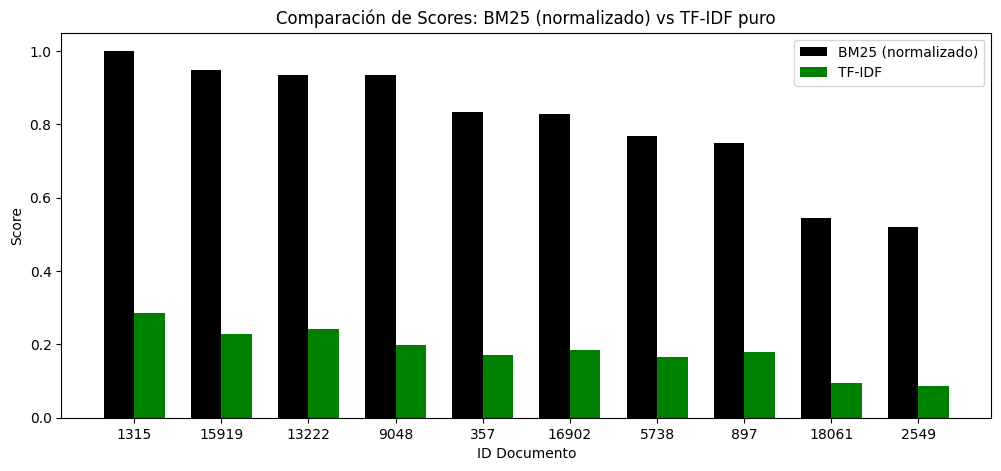

In [75]:
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import numpy as np

# Normalizar BM25 solo para la visualización
scores_bm25_norm = minmax_scale(scores_bm25)
scores_bm25_show = [scores_bm25_norm[i] for i in docs_union]

x = np.arange(len(docs_union))
width = 0.35

plt.figure(figsize=(12, 5))
plt.bar(x - width/2, scores_bm25_show, width, label='BM25 (normalizado)', color='black')
plt.bar(x + width/2, scores_tfidf_show, width, label='TF-IDF', color='green')
plt.xlabel('ID Documento')
plt.ylabel('Score')
plt.title('Comparación de Scores: BM25 (normalizado) vs TF-IDF puro')
plt.xticks(x, docs_union)
plt.legend()
plt.show()


In [62]:
import pandas as pd

tabla_comparacion = pd.DataFrame({
    "ID Documento": docs_union,
    "BM25": scores_bm25_show,
    "TF-IDF": scores_tfidf_show,
    "Texto (limpio)": [newsgroupsdocs_clean[i][:50].replace('\n', ' ') + "..." for i in docs_union]
})

display(tabla_comparacion)


,ID Documento,BM25,TF-IDF,Texto (limpio)
0,1315,10.697733,0.285945,remember god extinguished blasphemous trash eu...
1,15919,10.141336,0.227026,wetteland comes dl april rd evaluated th throw...
2,13222,10.011163,0.240649,right supposing problem xmncolormap xtncolorma...
3,9048,10.011163,0.197278,recovering case chicken pox contracted year ol...
4,357,8.923082,0.171949,read code put applications virtual desktop stu...
5,16902,8.848179,0.185250,stuff deleted recall author original article s...
6,5738,8.217939,0.166247,please note bill clinton probably little anyth...
7,897,8.007849,0.179636,reading far much aside obvious fact hold anybo...
8,18061,5.835826,0.095905,reminds last graham kerr cooking show saw toda...
9,2549,5.574705,0.087123,furthermore response earlier message u est out...


## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?"

In [66]:
# Consulta usada
consulta = "chicken"

# Define manualmente los IDs de documentos relevantes 
relevantes = [2549, 357, 15919, 897]
print("Documentos considerados relevantes:", relevantes)


Documentos considerados relevantes: [2549, 357, 15919, 897]


In [67]:
def precision_at_k(ranking, relevantes, k=3):
    # Calcula el número de relevantes en el top-k
    ranking_topk = ranking[:k]
    num_relevantes = sum([1 for doc_id in ranking_topk if doc_id in relevantes])
    return num_relevantes / k

# Calcula el ranking de ambos modelos
ranking_bm25 = np.argsort(scores_bm25)[::-1]
ranking_tfidf = np.argsort(scores_tfidf)[::-1]

# Precision@3
precision3_bm25 = precision_at_k(ranking_bm25, relevantes, k=3)
precision3_tfidf = precision_at_k(ranking_tfidf, relevantes, k=3)

print(f"Precision@3 BM25: {precision3_bm25:.2f}")
print(f"Precision@3 TF-IDF: {precision3_tfidf:.2f}")


Precision@3 BM25: 0.33
Precision@3 TF-IDF: 0.33


In [68]:
def average_precision(ranking, relevantes, k=10):
    hits = 0
    sum_precisions = 0
    for i in range(min(k, len(ranking))):
        if ranking[i] in relevantes:
            hits += 1
            sum_precisions += hits / (i + 1)
    if hits == 0:
        return 0
    return sum_precisions / hits

# MAP@10
map_bm25 = average_precision(ranking_bm25, relevantes, k=10)
map_tfidf = average_precision(ranking_tfidf, relevantes, k=10)

print(f"MAP@10 BM25: {map_bm25:.2f}")
print(f"MAP@10 TF-IDF: {map_tfidf:.2f}")


MAP@10 BM25: 0.42
MAP@10 TF-IDF: 0.37


In [72]:
if precision3_bm25 > precision3_tfidf:
    mejor = "BM25"
elif precision3_bm25 < precision3_tfidf:
    mejor = "TF-IDF"
else:
    mejor = "Empate"

print(f"\nEl modelo que da mejores resultados respecto a mi criterio de relevancia (Precision@3) es: {mejor}.")
print("Justificación: El modelo", mejor, "recuperó más documentos relevantes en el top 3 según los documentos que considero relevantes para la consulta.\n")

if map_bm25 > map_tfidf:
    elmejor = "BM25"
elif map_bm25 < map_tfidf:
    elmejor = "TF-IDF"
else:
    elmejor = "Empate"

print(f"\nEl modelo que da mejores resultados respecto a mi criterio de relevancia (MAP@10) es: {elmejor}.")
print("Justificación: El modelo", elmejor, "recuperó más documentos relevantes en el top 3 según los documentos que considero relevantes para la consulta.")



El modelo que da mejores resultados respecto a mi criterio de relevancia (Precision@3) es: Empate.
Justificación: El modelo Empate recuperó más documentos relevantes en el top 3 según los documentos que considero relevantes para la consulta.


El modelo que da mejores resultados respecto a mi criterio de relevancia (MAP@10) es: BM25.
Justificación: El modelo BM25 recuperó más documentos relevantes en el top 3 según los documentos que considero relevantes para la consulta.
